In [0]:
import matplotlib.pyplot as plt
def grafica1():

  
  plt.axhline(0, 0.25, 0.75, color = 'r',linewidth=5)
  plt.axhline(2, 0.25, 0.75,color = 'b',linewidth=5)
  plt.axvline(0, 0.25, 0.75,color = 'g',linewidth=5)
  plt.axvline(2, 0.25, 0.75,color = 'm',linewidth=5)

  plt.axhline(0.666, 0.25, 0.75, color = 'k',linestyle = '--',linewidth=0.9)
  plt.axhline(1.333, 0.25, 0.75,color = 'k',linestyle = '--',linewidth=0.9)
  plt.axvline(0.666, 0.25, 0.75,color = 'k',linestyle = '--',linewidth=0.9)
  plt.axvline(1.333, 0.25, 0.75,color = 'k',linestyle = '--',linewidth=0.9)

  plt.annotate(r'$P_{11}$',(0.666, 0.8),fontsize=15)
  plt.annotate(r'$P_{12}$',(0.666,1.5),fontsize=15)
  plt.annotate(r'$P_{22}$',(1.333,1.5),fontsize=15)
  plt.annotate(r'$P_{21}$',(1.333, 0.8),fontsize=15)

  x = points = [(0, 0),(0.666,0.666),(1.333,1.333),(2,2),]
  y= points = [(0.666, 1.333),(0,2),(0,2),(0.666,1.333),]
  plt.plot(x,y, 'ko')

  plt.annotate(r'$P_{10}$',(-0.4, 0.666),fontsize=15)
  plt.annotate(r'$P_{20}$',(-0.4,1.333),fontsize=15)
  plt.annotate(r'$P_{13}$',(0.5,2.2),fontsize=15)
  plt.annotate(r'$P_{23}$',(1.2, 2.2),fontsize=15)
  plt.annotate(r'$P_{32}$',(2.1,1.333),fontsize=15)
  plt.annotate(r'$P_{31}$',(2.1,0.666),fontsize=15)
  plt.annotate(r'$P_{01}$',(0.5,-0.35),fontsize=15)
  plt.annotate(r'$P_{02}$',(1.2,-0.35),fontsize=15)

  x = points = [(0.666, 0.666),(1.333,1.333),]
  y= points = [(0.666, 1.333),(0.666,1.333),]
  plt.plot(x,y, 'ro')
  plt.axis([-1,3,-1,3])
  plt.show()

# Resolución de sistemas de ecuaciones lineales utilizando el método iterativo de Gauss-Seidel

Un sistema con *m* ecuaciones lineales y n incógnitas se escribe como

\begin{equation}
  \begin{pmatrix}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    a_{21} & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{m1} & a_{m2} & \cdots & a_{mn}
  \end{pmatrix}
  \begin{pmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
  \end{pmatrix}
  =
  \begin{pmatrix}
    b_1 \\
    b_2 \\
    \vdots \\
    b_m
  \end{pmatrix}
\end{equation}


El método de Gauss-Seidel puede aplicarse a cualquier sistema de ecuaciones lineales que produzca una matriz **cuadrada** de coeficientes con los elementos de su diagonal no-nulos, la convergencia del método solo se garantiza si la matriz es **diagonalmente dominante** o si es **simétrica** y, a la vez, **definida positiva**.

Con este método se acelera la convergencia utilizando cada nuevo valor calculado para obtener el valor de la siguiente ecuación. La idea es hacer iteraciones, a partir de un vector inicial, para encontrar las soluciones dentro de una tolerancia deseada.

\begin{equation}
  {x_i}^{(k)} = \frac{1}{a_{ij}} \left( b_i - \sum_{j=1}^{i-1} a_{ij}{x_j}^{k} - \sum_{j=i+1}^{n} a_{ij}{x_j}^{(k-1)} \right)
\end{equation}

A continuación se muestra la condición para que el método converja

* El valor absoluto de las pendientes de la ecuación, deben ser menor a 1

\begin{equation}
  \left| \frac{a_{21}}{a_{22}} \right| < 1 \quad \quad \left| \frac{a_{21}}{a_{22}} \right| < 1 
\end{equation}

* Esto significa que el elemento de la diagonal debe ser mayor que el elemento fuera de la diagonal de la matriz

\begin{equation}
  \left|a_{22}\right| > \left|a_{21}\right| \quad \quad \left|a_{11}\right| > \left|a_{12}\right|
\end{equation}

* De forma generalizada

\begin{equation}
  a_{ii} > \sum_{i=1}^{n} a_{ij} \quad \forall j\neq i
\end{equation}

Para un sistema de ecuaciones de 3x3 como este

\begin{equation}
  a_{11}x_1 + a_{12}x_2 + a_{13}x_3 = b_1 \\
  a_{21}x_1 + a_{22}x_2 + a_{23}x_3 = b_2 \\
  a_{31}x_1 + a_{32}x_2 + a_{33}x_3 = b_3 \\
\end{equation}

Despejando x_1, x_2, x_3 y adicionando los valores obtenidos

\begin{equation}
{x_1}^{(k+1)} = \frac{b_1 - a_{12}{x_2}^{(k)} - a_{13}{x_3}^{(k)}}{a_{11}}
\end{equation}

\begin{equation}
{x_2}^{(k+1)} = \frac{b_2 - a_{21}{x_1}^{(k+1)} - a_{23}{x_3}^{(k)}}{a_{22}}
\end{equation}

\begin{equation}
{x_3}^{(k+1)} = \frac{b_3 - a_{31}{x_1}^{(k+1)} - a_{32}{x_2}^{(k+1)}}{a_{33}}
\end{equation}

## Cáclulo del error

$$\varepsilon = \left| \frac{{x_r}^{nuevo} - {x_r}^{anterior}}{{x_r}^{nuevo}} \right| $$


In [0]:
import numpy as np
import matplotlib as plt

def GaussSeidel(A,B,x):
  n=len(x)
  for i in range(n):
    s=0
    for j in range(n):
      if i != j:
        s=s+A[i,j]*x[j]
    x[i]=(B[i]-s)/A[i,i]
  return x

#Condicionando con iteraciones o tolerancia

def GaussSeidelCond(A,B,x,tol,iteration):
  n=len(x)
  t=x.copy()
  for k in range(iteration):
    x = GaussSeidel(A,B,x)
    error = np.linalg.norm(np.array(x) - np.array(t),np.inf)
    if error<tol:
      return x, k
    else:
      t=x.copy()
  return [], iteration    

In [3]:
# Ejemplo 1

A=np.array([[4,-1,1],[4,-8,1],[-2,1,5]],float)
B=np.array([[7],[-21],[15]],float)
x=np.array([[1],[1],[1]],float)

tol=0.005
iteration=20

x, total_iter = GaussSeidelCond(A,B,x,tol,iteration)

print('Soluciones\n')
print(x)
print('\nIteraciones: ', total_iter)

Soluciones

[[1.99990293]
 [3.99990845]
 [2.99997948]]

Iteraciones:  4


In [4]:
# Ejemplo 2

A=np.array([[-2,1,5],[4,-8,1],[4,-1,1]],float)
B=np.array([[15],[-21],[7]],float)
x=np.array([[1],[1],[1]],float)

tol=0.005
iteration=20

x, total_iter = GaussSeidelCond(A,B,x,tol,iteration)

print('Soluciones\n')
print(x)
print('\nIteraciones: ', total_iter)

Soluciones

[]

Iteraciones:  20


#ECUACIONES DIFERENCIALES PARCIALES (EDP)

Se llama ecuación diferencial parcial a las que presentan la siguiente forma general:

$$F(x_{1},..,x_{n},u,\frac{\partial u}{\partial x_{1}},..,\frac{\partial u}{\partial x_{n}},\frac{\partial^mu }{\partial x_{1}^{k_{1}}...x_{n}^{k_{n}}})=0$$

Las EDP se utilizan para modelar procesos que tienen una variación temporal y una variación espacial tales como, la variación del calor con el tiempo en un sólido, la distribución de poblaciones en un determinado habitat, en el tiempo o la propagación del sonido de las cuerdas de una guitarra.

En general las EDP son bastante difíciles de resolver de forma analítica.

Existen algunas EDP definidas como son:

**Ecuación de laplace**

$$\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2u }{\partial x^2}=0$$

**Ecuación de Fourier**

$$\frac{\partial u}{\partial t}-\alpha ^{2}\frac{\partial^2 u}{\partial x^2}=0$$

**Ecuación de Onda**

$$\frac{\partial^2 u}{\partial x^2}-\frac{\partial^2u }{\partial x^2}=0$$

##Método Iterativo de Gauss-Seidel
$$x_{i}^{k}=\frac{1}{a_{ii}}(b_{i}-\sum _{j=1}^{i-1}a_{ij}x_{j}^{k}-\sum _{j=1}^{n}a_{ij}x_{j}^{k-1})$$

Ahora se aplicará el método a la ecuación de Laplace para ello primero se expresará de manera distnta la ecuación diferencial mediante el método de diferencias finitas.

$$\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2u }{\partial x^2}=0$$

$$\frac{\partial^2 u}{\partial x^2}=\frac{1}{h^{2}}(u(x+h,y)-2u(x,y)+u(x-h,y))$$

$$\frac{\partial^2 u}{\partial y^2}=\frac{1}{h^{2}}(u(x,y+h)-2u(x,y)+u(x,y-h))$$

Reemplazando esto en la ecuación de Laplace se obtiene:



$$\frac{1}{h^{2}}(u(x+h,y)+u(x-h,y)+u(x,y+h)+u(x,y-h)-4u(x,y))=0$$

Se hará un análisis de condiciones de frontera utilizando un espacio cuadrado, para estudiar variaciones en los componentes $i,j$

$$u(x+h,y)=u_{i+1,j}$$

$$u(x,y+h)=u_{i,j+1}$$

$$u(x-h,y)=u_{i-1,j}$$

$$u(x,y-h)=u_{i,j-1}$$



Se cambian los desplazamientos por subíncies de posición.


$$u_{i+1,j}+u_{i,j+1}+u_{i-1,j}+u_{i,j-1}-4u_{i,j}=0$$

Definimos la región de análisis de frontera

$$ 0 < x < 2$$
$$ 0 < y < 2$$

Las condiones de frontera son:

$$u(x,0)=0$$

$$u(0,y)=0$$

$$u(2,y)=y(2-y)\rightarrow 0 < y < 2$$

$$u(x,2)=\left\{\begin{matrix}\quad x \quad \rightarrow 0 < x < 1
\\ x-2       \rightarrow 0 \leq  x < 2
\end{matrix}\right.$$




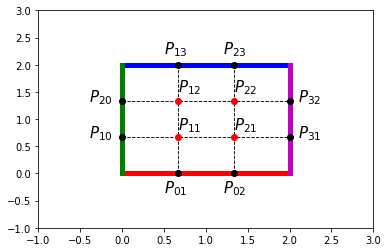

In [7]:
grafica1()

De acuerdo a la gráfica interior se analizan los puntos y su valor con respecto a las condiones de forntera

$$u(P_{i,j})=u(ih,jh)=u_{ij}$$

Para hallar el valor de U de acuerdo a las condicones de frontera se tiene que determinar:

Número de intervalos ($n$): 3

Longitud de lado ($L$): 2

$$h=\frac{L}{n}= \frac{2}{3}$$

Ahora se determina el valor de las componentes así:




* **$u(x,0)=0$**
$$u(P_{10})=u(h,0)=u_{10}=u(\frac{2}{3},0)=0$$
$$u(P_{20})=u(2h,0)=u_{20}=u(\frac{4}{3},0)=0$$

* **$u(0,y)=0$**
$$u(P_{01})=u(0,h)=u_{01}=u(0,\frac{2}{3})=0$$
$$u(P_{02})=u(0,2h)=u_{02}=u(0,\frac{4}{3})=0$$

* **$u(2,y)=y(2-y)$**
$$u(P_{31})=u(3h,h)=u_{31}=u(2,\frac{2}{3})=\frac{2}{3}(2-\frac{2}{3})=\frac{8}{9}$$
$$u(P_{32})=u(3h,2h)=u_{32}=u(4,\frac{4}{3})=\frac{4}{3}(2-\frac{4}{3})=\frac{8}{9}$$

* **$u(x,2)=\left\{\begin{matrix}\quad x \quad \rightarrow 0 < x < 1
\\ x-2       \rightarrow 0 \leq  x < 2
\end{matrix}\right.$**

$$u(P_{13})=u(h,3h)=u_{13}=u(\frac{2}{3},2)=\frac{2}{3}$$
$$u(P_{23})=u(2h,3h)=u_{23}=u(\frac{4}{3},2)=\frac{2}{3}-2=\frac{2}{3}$$

Ahora tomamos la ecuación diferencial con diferencias finitas encontranda:

$$u_{i+1,j}+u_{i,j+1}+u_{i-1,j}+u_{i,j-1}-4u_{i,j}=0$$

* **i=1,j=1**
$$u_{21}+u_{12}+u_{01}+u_{10}-4u_{11}=0$$
$$u_{21}+u_{12}+0+0-4u_{11}=0$$
$$-4u_{11}+u_{12}+u_{21}=0$$


* **i=2,j=1**
$$u_{31}+u_{22}+u_{11}+u_{20}-4u_{21}=0$$
$$\frac{8}{9}+u_{22}+u_{11}+0-4u_{21}=0$$
$$u_{11}-4u_{21}+u_{22}=-\frac{8}{9}$$

* **i=1,j=2**
$$u_{22}+u_{13}+u_{02}-4u_{12}=0$$
$$u_{22}+\frac{2}{3}+0+u_{11}-4u_{12}=0$$
$$u_{11}-4u_{12}+u_{22}=-\frac{2}{3}$$

* **i=2,j=2**
$$u_{32}+u_{23}+u_{12}+u_{21}-4u_{22}=0$$
$$u_{21}+u_{12}-4u_{22}=-\frac{14}{9}$$


Obtenemos el siguiente sistema de ecuaciones lineales.

\begin{equation}
  \begin{pmatrix}
    -4 & 1 & 1 & 0 \\
    1 & -4 & 0 & 1  \\
    1 &  0 &-4 & 1  \\
    0 & 1 & 1 & -4
  \end{pmatrix}
  \begin{pmatrix}
    u_{11} \\
    u_{21} \\
    u_{12} \\
    u_{22}
  \end{pmatrix}
  =
  \begin{pmatrix}
    0 \\
    -\frac{8}{9} \\
    -\frac{2}{3} \\
    -\frac{14}{9}
  \end{pmatrix}
\end{equation}
 Asi queda representada la ecuación diferencial de Laplace mediante ecuaciones lineales. Ahora se procede a aplicar el método de Gauus-Seidel

In [8]:
A=np.array([[-4,1,1,0],[1,-4,0,1],[1,0,-4,1],[0,1,1,-4]],float)
B=np.array([[0],[-8/9],[-2/3],[-14/9],float])
u=np.array([[1],[1],[1],[1]],float)

tol=0.0001
ite=20
u=GaussSeidel(A,B,u)
u=GaussSeidel(A,B,u)
u=GaussSeidel(A,B,u)
u=GaussSeidel(A,B,u)
u=GaussSeidel(A,B,u)
u=GaussSeidel(A,B,u)
print('Sin cond\n',u)
uC,it=GaussSeidelCond(A,B,u,tol,ite)
print('Con cod\n',uC,it)



Sin cond
 [[0.19479709]
 [0.41684299]
 [0.36128743]
 [0.5834215 ]]
Con cod
 [[0.19446648]
 [0.41667769]
 [0.36112213]
 [0.58333884]] 1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


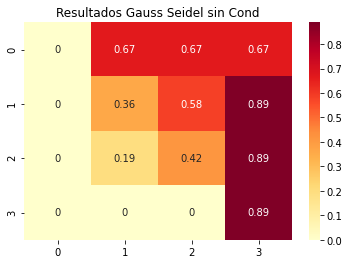

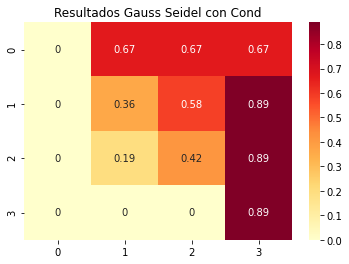

In [9]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Grafico de temperatura con resultados de Gauss Seidel sin cond
data = np.array([[0,2/3,2/3,2/3],[0,u[2],u[3],8/9],[0,u[0],u[1],8/9],[0,0,0,8/9]],float)
heat_map = sb.heatmap(data, annot=True,cmap="YlOrRd")
plt.title("Resultados Gauss Seidel sin Cond")
plt.show()

# Grafico de temperatura con resultados de Gauss Seidel con cond
data = np.array([[0,2/3,2/3,2/3],[0,uC[2],uC[3],8/9],[0,uC[0],uC[1],8/9],[0,0,0,8/9]],float)
heat_map = sb.heatmap(data, annot=True,cmap="YlOrRd")
plt.title("Resultados Gauss Seidel con Cond")
plt.show()

##Para cualquier valor de frontera 

In [0]:
#Puntos lado izquierdo 
P10 = 10
P20 = 20

#Puntos lado arriba
P13 = 30
P23 = 30

#Puntos lado derecho
P32 = 50
P31 = 50

#Puntos lado abajo
P01 = 60
P02 = 70

A=np.array([[-4,1,1,0],[1,-4,0,1],[1,0,-4,1],[0,1,1,-4]],float)
B=np.array([[-P01-P10],[-P20-P31],[-P02-P13],[-P32-P23],float])
u=np.array([[1],[1],[1],[1]],float)

In [11]:
tol=0.0001
ite=20
u=GaussSeidel(A,B,u)
u=GaussSeidel(A,B,u)
u=GaussSeidel(A,B,u)
u=GaussSeidel(A,B,u)
u=GaussSeidel(A,B,u)
u=GaussSeidel(A,B,u)
print('Sin cond\n',u)
uC,it=GaussSeidelCond(A,B,u,tol,ite)
print('Con cod\n',uC,it)


Sin cond
 [[37.88769531]
 [37.06884766]
 [44.56884766]
 [40.40942383]]
Con cod
 [[37.91663837]
 [37.08331919]
 [44.58331919]
 [40.41665959]] 4


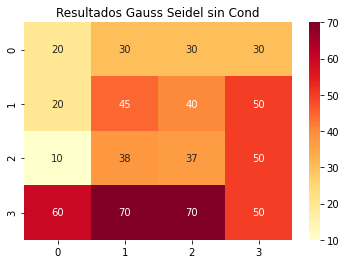

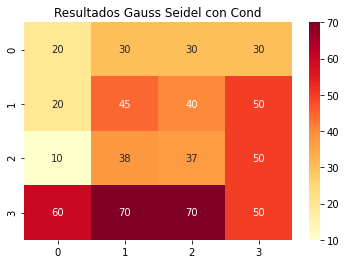

In [12]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Grafico de temperatura con resultados de Gauss Seidel sin cond
data = np.array([[P20,P13,P23,P23],[P20,u[2],u[3],P32],[P10,u[0],u[1],P31],[P01,P02,P02,P31]],float)
heat_map = sb.heatmap(data, annot=True,cmap="YlOrRd")
plt.title("Resultados Gauss Seidel sin Cond")
plt.show()

# Grafico de temperatura con resultados de Gauss Seidel con cond
data = np.array([[P20,P13,P23,P23],[P20,u[2],u[3],P32],[P10,u[0],u[1],P31],[P01,P02,P02,P31]],float)
heat_map = sb.heatmap(data, annot=True,cmap="YlOrRd")
plt.title("Resultados Gauss Seidel con Cond")
plt.show()

In [13]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
#f = np.array([1,1,1,1,-4],int)

intervalos = 2
num_ecu = ((intervalos**2)+(2*intervalos)+1)
ecuaciones = np.zeros((num_ecu, 1),dtype=object)



k=0
for j in range(intervalos+1):
  for i in range(intervalos+1):
    a = (i+2,j+1)
    b = (i+1,j+2)
    c = (i,j+1)
    d = (i+1,j)
    e = (i+1,j+1)
    ecuaciones[k,0] = [a,b,c,d,e] 
    k=k+1
ecuaciones


array([[list([(2, 1), (1, 2), (0, 1), (1, 0), (1, 1)])],
       [list([(3, 1), (2, 2), (1, 1), (2, 0), (2, 1)])],
       [list([(4, 1), (3, 2), (2, 1), (3, 0), (3, 1)])],
       [list([(2, 2), (1, 3), (0, 2), (1, 1), (1, 2)])],
       [list([(3, 2), (2, 3), (1, 2), (2, 1), (2, 2)])],
       [list([(4, 2), (3, 3), (2, 2), (3, 1), (3, 2)])],
       [list([(2, 3), (1, 4), (0, 3), (1, 2), (1, 3)])],
       [list([(3, 3), (2, 4), (1, 3), (2, 2), (2, 3)])],
       [list([(4, 3), (3, 4), (2, 3), (3, 2), (3, 3)])]], dtype=object)

# Bibliografía

* Ojeda, L. R. (2016). Análisis numérico básico. Un enfoque algorítmico con el soporte de Python, Guayaquil: Escuela Superior Politécnica del Litoral.

